# Table of contents

- Importin libraries
- Create subset for line chart
- Cleaning time-series data
- Time-series analysis: decomposition
- Stationarity testing
- Stationarizing the data set

In [1]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")


In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 6'

In [3]:
df_voter = pd.read_csv(os.path.join(path, 'Main', 'idea_clean2.csv'), index_col = False)

In [4]:
df_voter.head()

,Country,Election type,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting
0,Afghanistan,Parliamentary,2018-01-01,0.4523,4000000,8843151,0.2181,18340292,34940837,0.0000,No
1,Afghanistan,Parliamentary,2010-01-01,0.3514,4216594,12000000,0.2971,14191908,29120727,0.0442,No
2,Afghanistan,Parliamentary,2005-01-01,0.4937,6406615,12977336,0.5171,12389532,26334702,0.0510,No
3,Afghanistan,Presidential,2019-01-01,0.1900,1824401,9600000,0.0963,18938369,35780458,0.0000,No
4,Afghanistan,Presidential,2014-01-01,0.3890,8109493,20845988,0.5003,16208255,31822848,0.0168,No


In [5]:
df_voter.shape

(1626, 11)

# Create subset for line chart

Chose only the year and the total vote because of the project goals is to see if the voter turnout was getting lower year after year

In [6]:
data = df_voter.groupby('Year').agg({'Total vote': ['sum']})

In [7]:
data.head(20)

,Total vote
,sum
Year,
2000-01-01,734193102
2001-01-01,378220929
2002-01-01,670937473
2003-01-01,336970027
2004-01-01,1506253938
2005-01-01,419168083
2006-01-01,724503850
2007-01-01,523364086


In [8]:
data.shape

(23, 1)

In [9]:
data.columns

MultiIndex([('Total vote', 'sum')],
           )

In [10]:
type(data)

pandas.core.frame.DataFrame

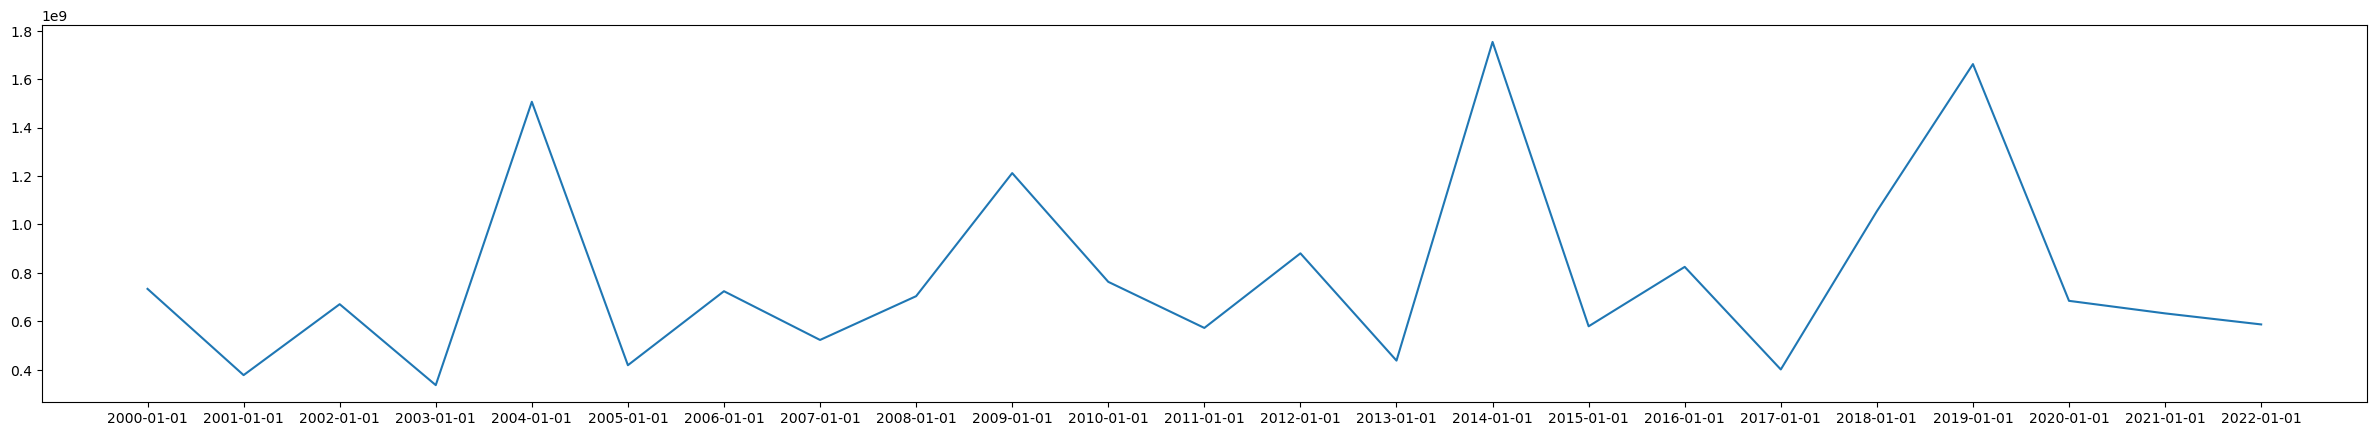

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(30,5), dpi=100) 
plt.plot(data)

# Cleaning time-series data

In [12]:
# Reset index so "Year" is a filter

data_2 = data.reset_index()

In [13]:
data_2.head()

,Year,Total vote
,,sum
0,2000-01-01,734193102
1,2001-01-01,378220929
2,2002-01-01,670937473
3,2003-01-01,336970027
4,2004-01-01,1506253938


In [14]:
data_2.columns

MultiIndex([(      'Year',    ''),
            ('Total vote', 'sum')],
           )

In [20]:
# Set the "Year" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2[('Year',)])
data_2 = data_2.set_index('datetime')
data_2.drop([('Year',)], axis=1, inplace=True)
data_2.head()

,Total vote
,sum
datetime,
2000-01-01,734193102
2001-01-01,378220929
2002-01-01,670937473
2003-01-01,336970027
2004-01-01,1506253938


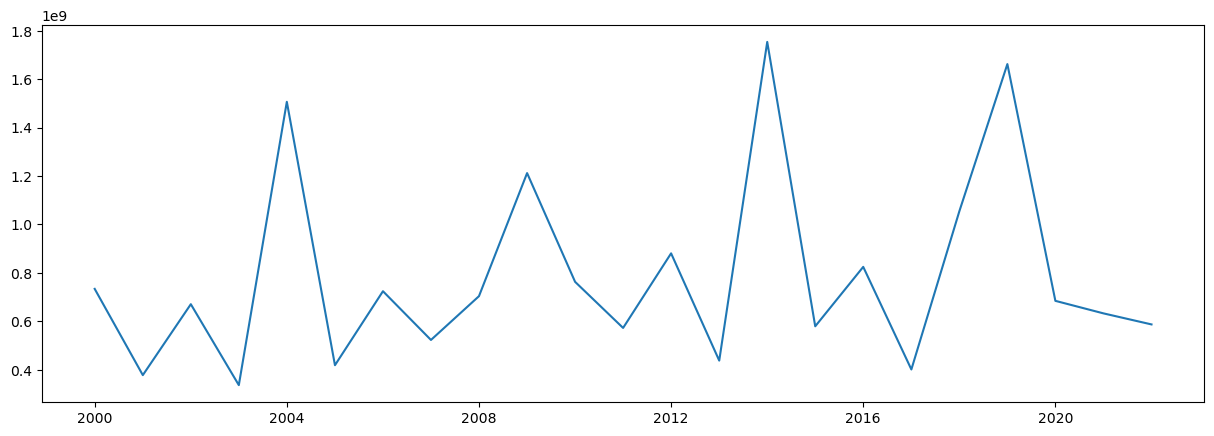

In [21]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

no cleaning needed. was not in previous tasks.

# Time-series analysis: decomposition

In [25]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [26]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

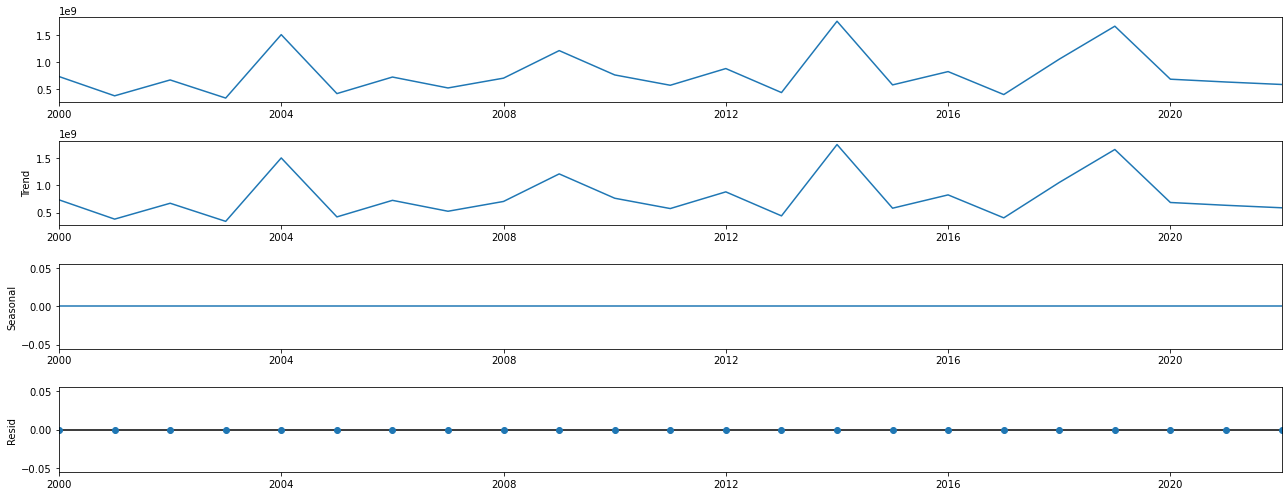

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

- since this data set is derived from years it has significantly reduced the noise making the Level and the trend identical
- there is no seasonality since elections are either scheduled or adhoc
- and there is no residual.

# Stationarity testing

Dickey-Fuller test 

In [22]:
# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Total vote'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.517656
p-value                         0.888525
Number of Lags Used             7.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


Using a significance level of 5 percent. The “Critical Value (5%)” has a value of -3.084908 which is much smaller than the test statistic, -0.517656. Therefore I can’t reject the null hypothesis. Meaning non-stationairy

Auto-correlattion check

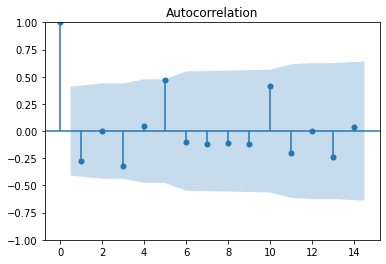

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_2)
plt.show()

Since most of the lines are below 0 this shows that it is stationnary compared to what the Dickey-Fuller test demonstrated. I'll still do the next steps to get both matching.

# Stationarizing the dataset

In [28]:
data_diff = data_2 - data_2.shift(1)

In [29]:
data_diff.dropna(inplace = True)

In [30]:
data_diff.columns

MultiIndex([('Total vote', 'sum')],
           )

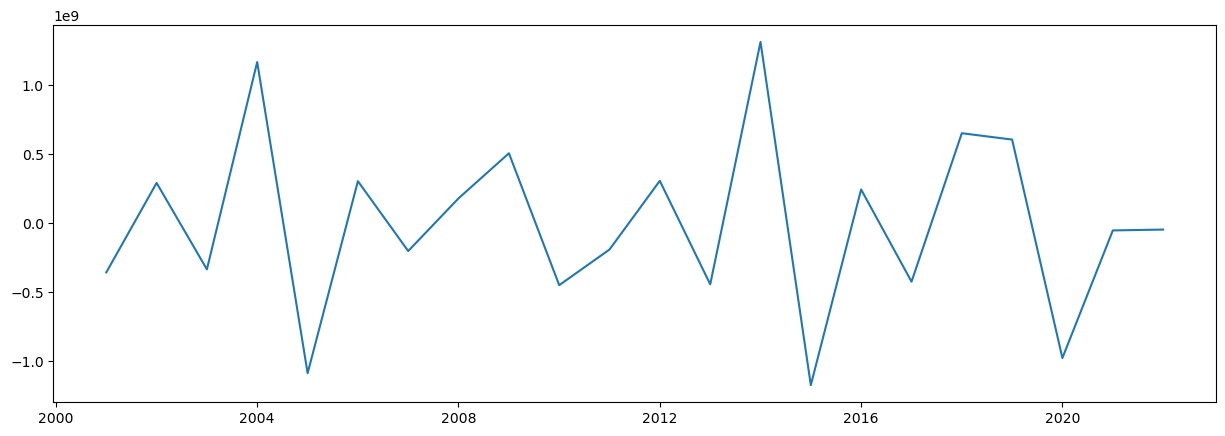

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.050358
p-value                         0.264938
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


Since the critical value is still smaller than the test statistics i will do the differencing again

In [33]:
data_diff2 = data_diff - data_diff.shift(1)

In [34]:
data_diff2.dropna(inplace = True)

In [35]:
data_diff.columns

MultiIndex([('Total vote', 'sum')],
           )

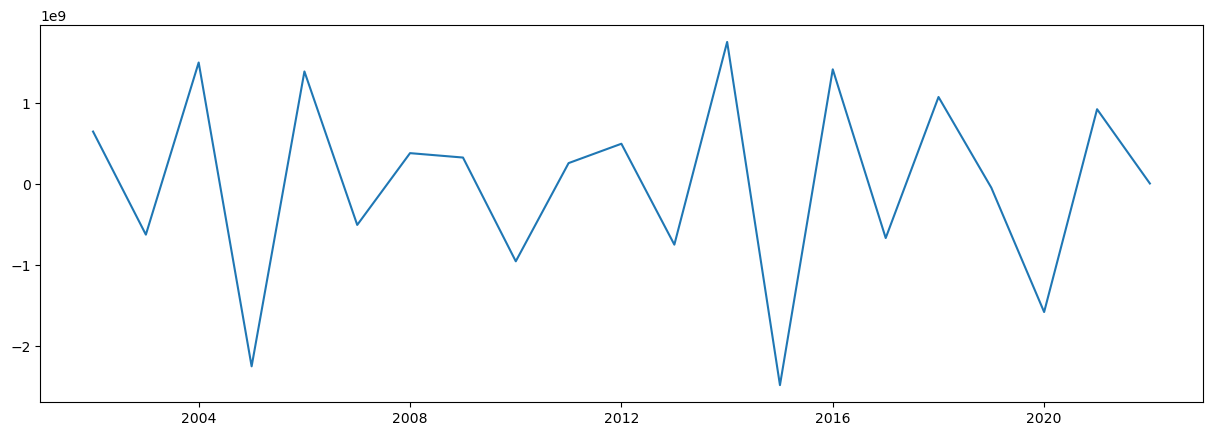

In [36]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [37]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.492552e+00
p-value                        1.216469e-08
Number of Lags Used            6.000000e+00
Number of Observations Used    1.400000e+01
Critical Value (1%)           -4.012034e+00
Critical Value (5%)           -3.104184e+00
Critical Value (10%)          -2.690987e+00
dtype: float64


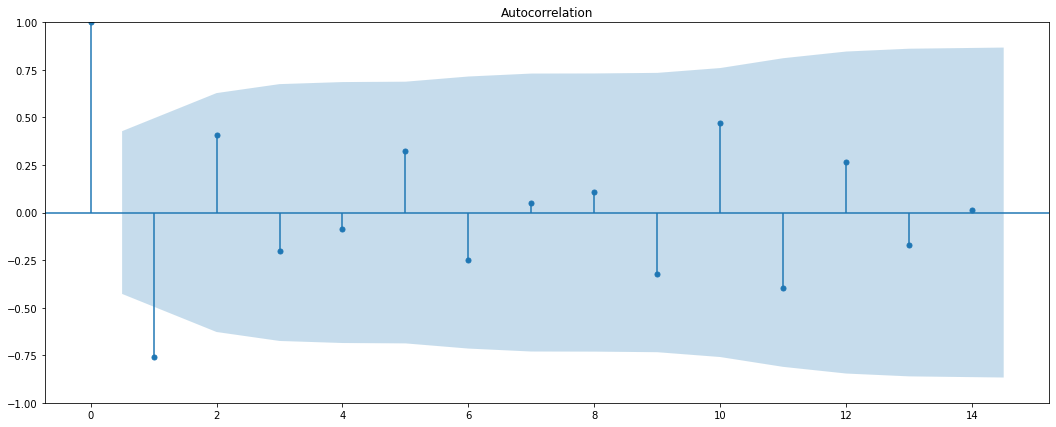

In [38]:
plot_acf(data_diff2)
plt.show()

Now the test statistic is now lower than the 5% critical and the autocorrelations have significantly improved.